#**Nama : M.Zhafir Zaydan**
#**NIM  : 21.11.3913**

- CRIM mengacu pada tingkat kejahatan per kapita dalam sebuah wilayah.                
- ZN adalah persentase luas lahan yang digunakan untuk tujuan residensial.                 
- INDUS menggambarkan persentase wilayah kota yang digunakan untuk bisnis non-ritel.                 
- CHAS merupakan variabel biner yang menunjukkan apakah properti berdekatan dengan sungai (1 jika iya, 0 jika tidak).                  
- NOX mengukur tingkat konsentrasi oksida nitrat dalam udara.                  
- RM adalah rata-rata jumlah kamar per hunian di wilayah tersebut.                     
- AGE mencerminkan persentase hunian yang sudah ada sebelum tahun 1940.
- DIS mengukur jarak rata-rata ke pusat kerja di Boston.
- RAD adalah indeks aksesibilitas jalan raya.
- TAX menggambarkan tarif pajak properti di wilayah tersebut.
- PTRATIO adalah rasio murid-guru di sekolah-sekolah di wilayah tersebut.
- B merupakan metrik yang berkaitan dengan persentase penduduk keturunan Afrika-Amerika.
- LSTAT adalah persentase penduduk yang berstatus ekonomi rendah.
- MEDV adalah nilai median rumah dalam ribuan dolar di wilayah tersebut.

In [ ]:
#mengimport library yang akan kita gunakan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from matplotlib import pyplot as plt
import seaborn as sns

# **AKUISISI DATA**

In [ ]:
# Mendownload dataset dan memberikan header
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(url, delim_whitespace=True, names=column_names)

In [ ]:
df.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


# **PREPROCESSING**

In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


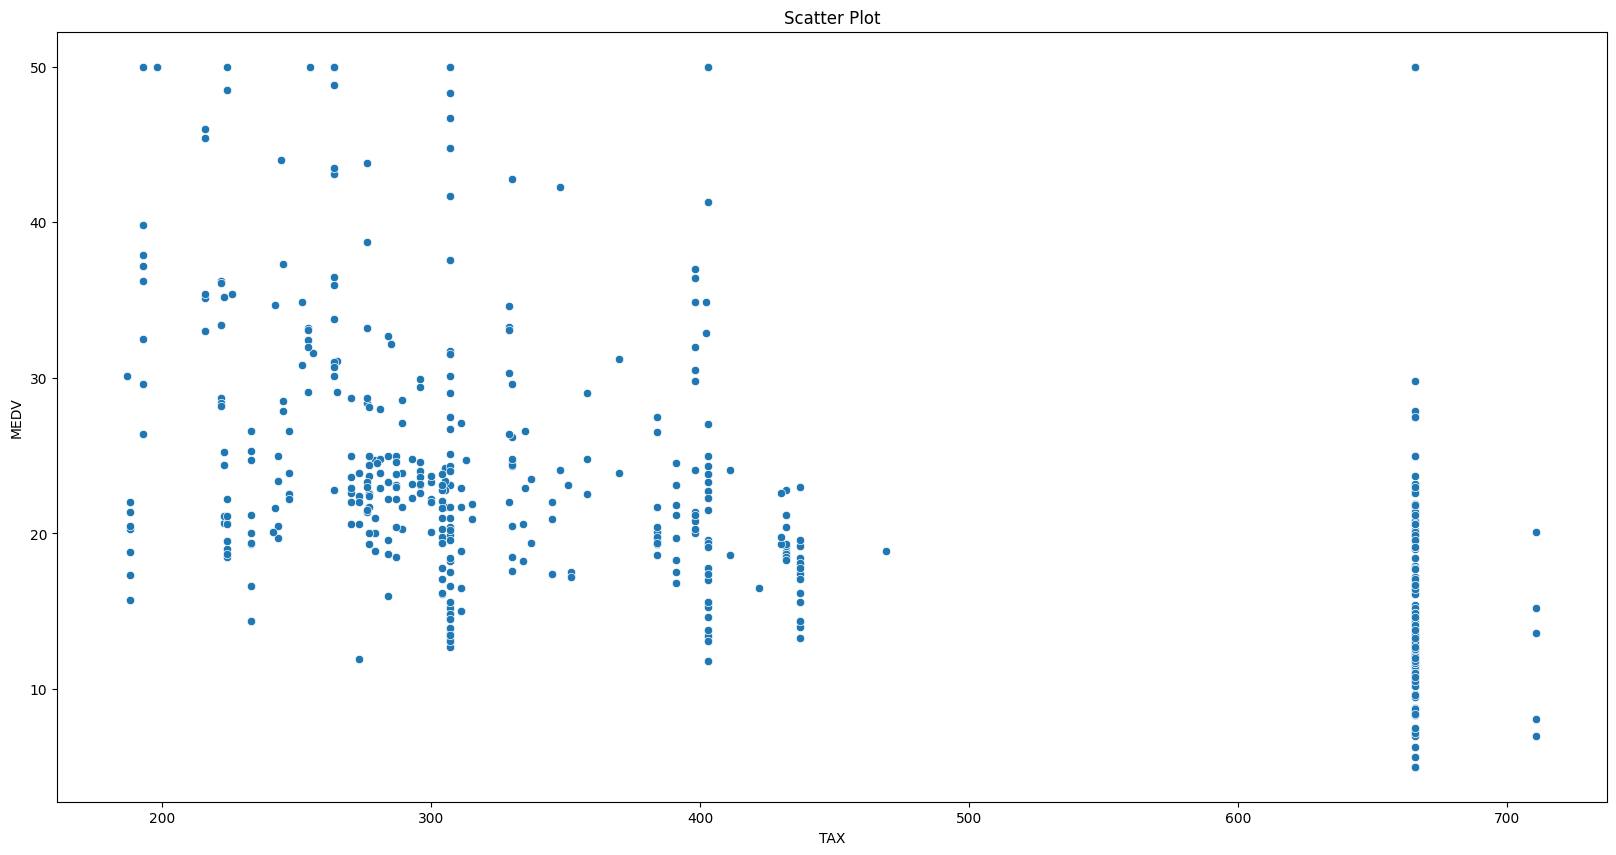

In [ ]:
# Menggunakan Scatter Plot
plt.figure(figsize=(20, 10))
sns.scatterplot(x='TAX', y='MEDV', data=df)
plt.title('Scatter Plot')
plt.xlabel('TAX')
plt.ylabel('MEDV')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

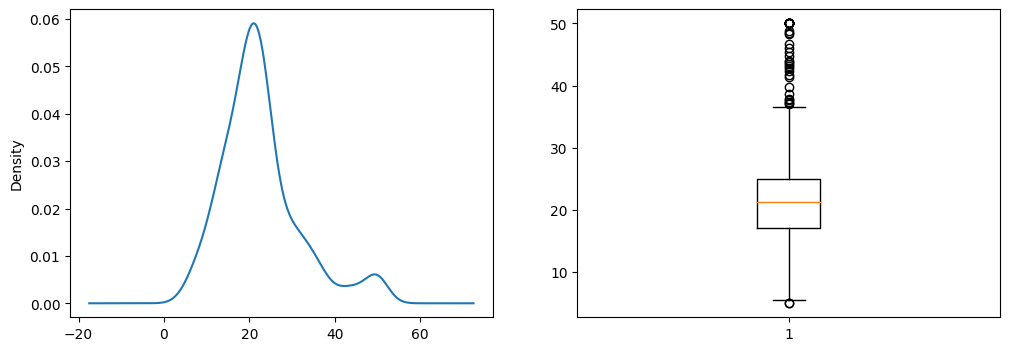

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['MEDV'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['MEDV'])
plt.show

# Exploratory Data Analysis (EDA)

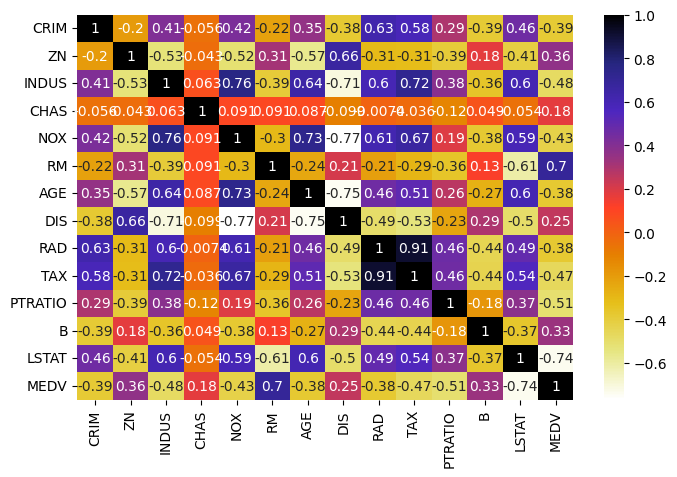

In [ ]:
# Membuat dan menampilkan Matriks korelasi dalam grafik heatmap
cor = df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

In [ ]:
X = df[[ 'CRIM', 'INDUS', 'AGE', 'RAD', 'TAX', 'LSTAT']]
y = df['NOX']

In [ ]:
# Split dataset menjadi data training 70% dan data testing 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

In [ ]:
# Normalisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Melakukan normalisasi data untuk mengubah nilai-nilai data agar memiliki skala yang relatif sama

In [ ]:
# Bangun model ANN/MLP
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

Saya membuat objek model menggunakan struktur Sequential. Pertama, saya menambahkan lapisan pertama dengan 64 neuron, dan aktivasi yang saya terapkan adalah ReLU (Rectified Linear Unit), yang sering digunakan dalam lapisan tersembunyi. Fungsi aktivasi ReLU membantu model menangani hubungan non-linear.

Selanjutnya, lapisan kedua juga memiliki 64 neuron dengan aktivasi ReLU, dan pola ini terus berlanjut untuk lapisan-lapisan berikutnya dalam model, dengan konfigurasi 64, 64, 64, 32, 32, dan 16 neuron dalam urutan tertentu.

Terakhir, lapisan terakhir hanya memiliki 1 neuron, karena ini adalah lapisan output. Fungsi aktivasi yang digunakan di lapisan ini adalah "linear," yang cocok digunakan karena kita ingin model menghasilkan prediksi dalam bentuk angka kontinu (linear).

In [ ]:
# Latih model menggunakan data latih
from keras.metrics import MeanSquaredError, MeanAbsoluteError, RootMeanSquaredError

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[MeanSquaredError(), MeanAbsoluteError(), RootMeanSquaredError()])

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
12/12 [==============================] - 2s 4ms/step - loss: 0.1794 - mean_squared_error: 0.1794 - mean_absolute_error: 0.3887 - root_mean_squared_error: 0.4235
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0406 - mean_squared_error: 0.0406 - mean_absolute_error: 0.1425 - root_mean_squared_error: 0.2015
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0144 - mean_squared_error: 0.0144 - mean_absolute_error: 0.0861 - root_mean_squared_error: 0.1198
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - mean_absolute_error: 0.0698 - root_mean_squared_error: 0.0988
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0635 - root_mean_squared_error: 0.0891
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - mean_absolute_error: 0.0

Saya menggunakan optimizer Adam dengan tingkat pembelajaran sebesar 0.001. Alasan penggunaan Adam adalah karena ini adalah salah satu optimizer yang paling umum digunakan dalam pelatihan model.

Sebagai fungsi kerugian, saya memilih Mean Squared Error (MSE). Selain itu, saya juga mempertimbangkan mean_absolute_error dan root_mean_squared_error sebagai metrik perbandingan.

Saya menjalankan pelatihan model selama 100 epoch, yang merupakan jumlah iterasi pelatihan. Dalam setiap iterasi, saya menggunakan batch size sebanyak 32 sampel. Batch size memengaruhi kecepatan pelatihan dan kebutuhan memori.

Selain itu, saya mengatur verbose ke 1. Verbose adalah tingkat detail informasi yang akan dicetak selama pelatihan model. Dengan nilai verbose 1, model akan mencetak informasi yang cukup informatif selama pelatihan.

In [ ]:
# Evaluasi model dan hitung MAE dan MSE
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

5/5 [==============================] - 0s 4ms/step
Mean Squared Error (MSE): 0.0028793660188179268
Mean Absolute Error (MAE): 0.03294688688704842


Saya menghasilkan variabel y_pred yang berisi hasil prediksi dari model yang telah dilatih ketika diterapkan pada data pengujian. Di sini, MAE (Mean Absolute Error) digunakan sebagai metrik untuk mengevaluasi sejauh mana model membuat kesalahan prediksi. Selain itu, saya juga memanfaatkan mean_squared_error untuk menghitung Mean Squared Error (MSE). MSE mengukur seberapa besar kesalahan prediksi dalam bentuk kuadrat. Tentunya, semakin mendekati 0 kesalahan error, semakin baik kualitas prediksi model. Dengan kata lain, jika kesalahan prediksi mendekati nol, maka prediksi model akan semakin akurat.

5/5 [==============================] - 0s 4ms/step


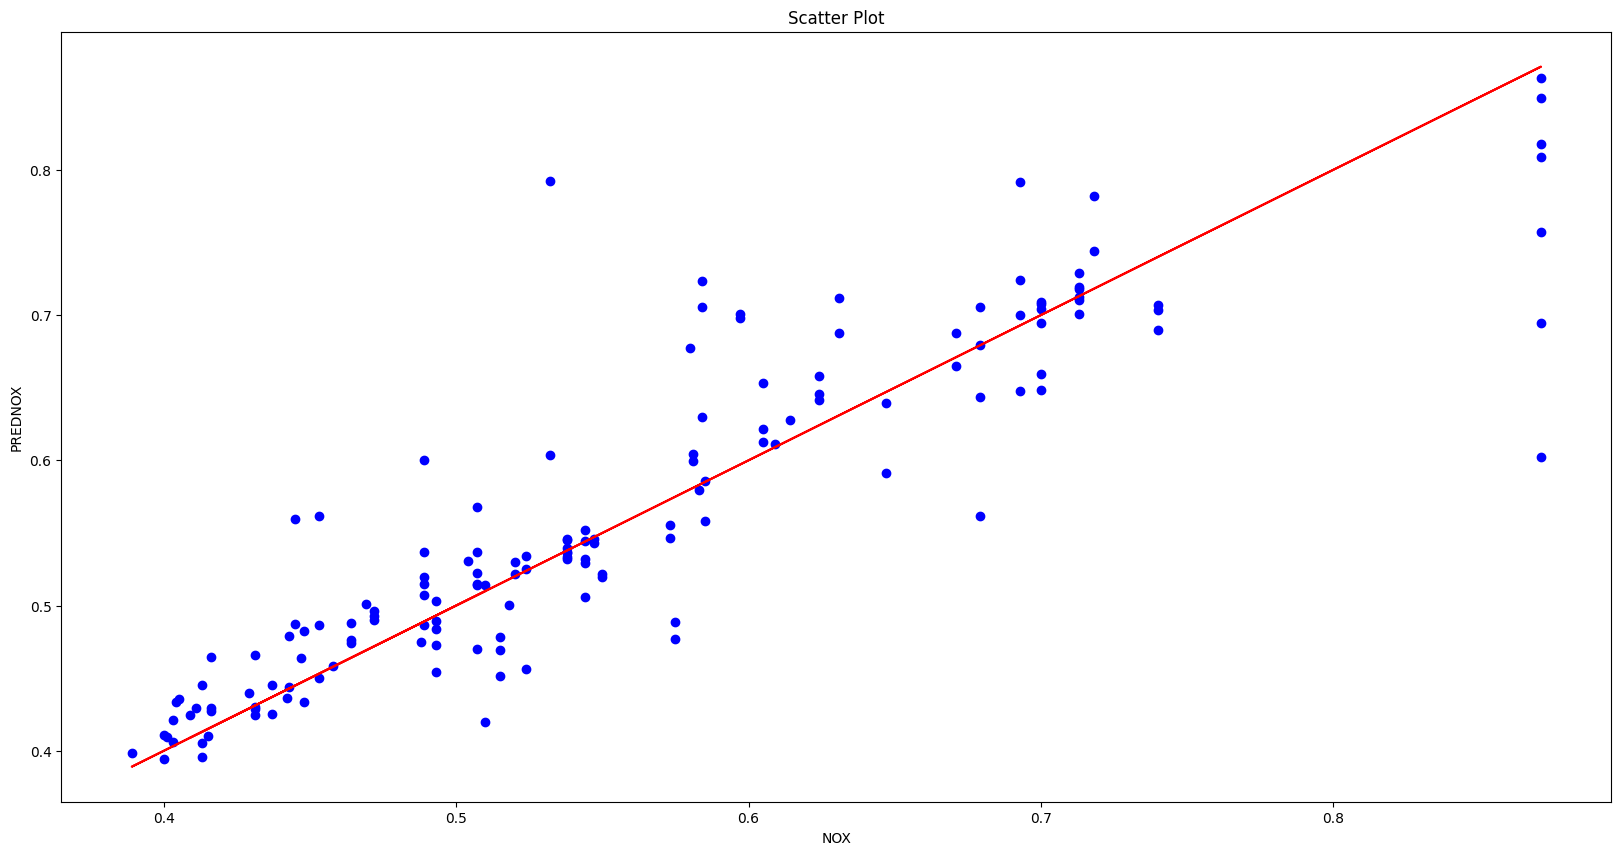

In [ ]:
# Menggunakan Scatter Plot
plt.figure(figsize=(20, 10))
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred, c='blue')
plt.plot(y_test, y_test, c='red')
plt.title('Scatter Plot')
plt.xlabel('NOX')
plt.ylabel('PREDNOX')
plt.show()

In [ ]:
# Menggabungkan data aktual (y_test) dan hasil prediksi (y_prediksi) dalam satu DataFrame
Prediksi_final = pd.DataFrame({'Data Aktual': y_test, 'Prediksi': y_pred.flatten()})

# Tampilkan hasil prediksi
print(Prediksi_final)

     Data Aktual  Prediksi
69        0.4090  0.424562
74        0.4370  0.445613
375       0.6710  0.664917
378       0.6710  0.687475
135       0.6240  0.641415
..           ...       ...
62        0.4530  0.486845
64        0.4161  0.464575
134       0.6240  0.657697
218       0.5500  0.521647
177       0.5100  0.513907

[152 rows x 2 columns]
